In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_moons

In [43]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [44]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [45]:
dataset = pd.DataFrame(df)
dataset.head()

,x1,x2,y
0,0.103686,0.935584,0
1,2.003063,0.459111,1
2,0.956933,0.067807,0
3,-0.282902,0.457086,1
4,0.113232,1.081643,0


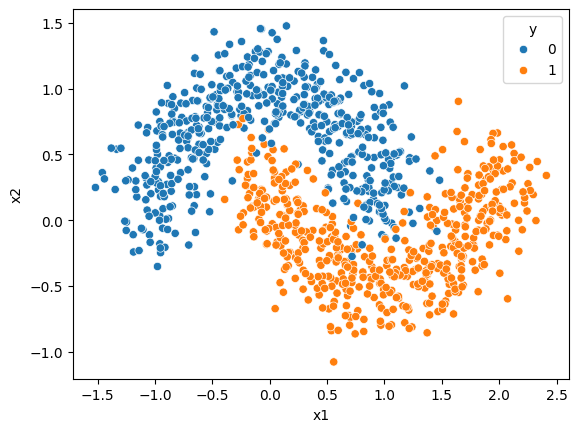

In [46]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [47]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [53]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train, y_train)*100, dt.score(x_test,y_test)*100

(100.0, 95.5)

In [54]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train, y_train)*100, sv.score(x_test,y_test)*100

(97.875, 96.0)

In [55]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train, y_train)*100, gnb.score(x_test,y_test)*100

(86.375, 86.0)

In [62]:
from sklearn.ensemble import VotingClassifier

In [63]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [78]:
vc = VotingClassifier(li,weights=[10,4,7])          # changing peramiter for high accurecy & (weights=) not mendatory
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[10, 4, 7])

In [79]:
vc.score(x_train, y_train)*100, vc.score(x_test,y_test)*100

(98.375, 96.5)

In [81]:
prediction = {"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [82]:
pd.DataFrame(prediction)

,dt,sv,gnb,vc
0,1,1,1,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
195,1,1,0,1
196,1,1,1,1
197,1,1,1,1
198,0,0,0,0
